In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob

In [2]:
filename1 = '/Users/Magnus/PhD/Code/MATLAB/Scripts/15_Circumferential_iterations/features_table.txt'
filename2 = '/Users/Magnus/PhD/Code/MATLAB/Scripts/15_Circumferential_iterations/features_table_random.txt'

In [3]:
df_raw1 = pd.read_csv(filename1)
df_raw2 = pd.read_csv(filename2)
frames = [df_raw1, df_raw2]
df_raw = pd.concat(frames)

In [4]:
len(df_raw)

900

In [5]:
gridsize = 0.2; # mm 

In [6]:
#Computes thickness in mm from number of nodes and gridsize
df_raw['ModelThickMax'] = gridsize * df_raw['ModelThickMax']
df_raw['ModelThickMin'] = gridsize * df_raw['ModelThickMin']
df_raw['ModelThickDiff'] = gridsize * df_raw['ModelThickDiff']
df_raw['ModelThickMedian'] = gridsize * df_raw['ModelThickMedian']
df_raw['ModelThickMean'] = gridsize * df_raw['ModelThickMean']
df_raw['ModelThickStd'] = gridsize * df_raw['ModelThickStd']

In [7]:
df_raw

,ModelThickMax,ModelThickMin,ModelThickDiff,ModelThickMedian,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
0,12.2,12.2,0.0,12.2,12.200000,0.000000,0.980,0.000087,-0.090215,-0.820041,0.000001,47851.5625,30273.4375
1,12.2,12.2,0.0,12.2,12.200000,0.000000,0.990,0.000087,-0.089597,-0.553822,0.000001,47851.5625,31250.0000
2,12.2,12.2,0.0,12.2,12.200000,0.000000,1.000,0.000086,-0.089083,-0.293270,0.000001,46875.0000,31250.0000
3,12.2,12.2,0.0,12.2,12.200000,0.000000,1.010,0.000085,-0.088695,-0.038224,0.000001,46875.0000,31250.0000
4,12.2,12.2,0.0,12.2,12.200000,0.000000,1.020,0.000084,-0.088149,0.211493,0.000001,45898.4375,31250.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,12.2,11.2,1.0,11.8,11.845156,0.265136,0.980,0.000089,-0.149091,-1.847189,0.000001,48828.1250,30273.4375
516,11.4,9.6,1.8,11.0,10.991719,0.333053,1.014,0.000087,-0.190519,-2.244434,0.000001,46875.0000,28320.3125
517,11.0,9.8,1.2,10.6,10.600468,0.306663,1.012,0.000089,-0.199816,-2.923062,0.000001,48828.1250,29296.8750
518,12.2,11.4,0.8,11.8,11.876250,0.226055,1.014,0.000086,-0.150921,-0.784272,0.000001,46875.0000,31250.0000


In [8]:
corr = df_raw.corr()

In [9]:
corr.style.background_gradient(cmap='coolwarm')

,ModelThickMax,ModelThickMin,ModelThickDiff,ModelThickMedian,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
ModelThickMax,1.000000,0.810129,-0.012276,0.991082,0.993499,-0.036577,0.032680,-0.653830,0.664941,-0.466901,-0.281788,-0.619189,0.396482
ModelThickMin,0.810129,1.000000,-0.596153,0.864079,0.863197,-0.580703,0.004166,-0.697299,0.855262,-0.363278,0.155132,-0.579073,0.359117
ModelThickDiff,-0.012276,-0.596153,1.000000,-0.116508,-0.111694,0.940367,0.037649,0.293910,-0.548119,-0.019805,-0.650503,0.139702,-0.069537
ModelThickMedian,0.991082,0.864079,-0.116508,1.000000,0.998275,-0.152281,0.026413,-0.683629,0.728225,-0.459008,-0.199669,-0.631166,0.401611
ModelThickMean,0.993499,0.863197,-0.111694,0.998275,1.000000,-0.147545,0.027568,-0.684629,0.728593,-0.457405,-0.202332,-0.632773,0.403225
ModelThickStd,-0.036577,-0.580703,0.940367,-0.152281,-0.147545,1.000000,0.038574,0.331569,-0.619743,-0.037161,-0.687209,0.177455,-0.092187
ModeVelCoeff,0.032680,0.004166,0.037649,0.026413,0.027568,0.038574,1.000000,-0.493659,0.011294,0.057482,0.064938,-0.447263,0.032068
EnvelopeAvgTimeDiff,-0.653830,-0.697299,0.293910,-0.683629,-0.684629,0.331569,-0.493659,1.000000,-0.536493,0.320140,-0.050646,0.701867,-0.344310
EnvelopeAvgAmpReduc,0.664941,0.855262,-0.548119,0.728225,0.728593,-0.619743,0.011294,-0.536493,1.000000,-0.257540,0.356011,-0.500995,0.416243
PhaseDiffMean,-0.466901,-0.363278,-0.019805,-0.459008,-0.457405,-0.037161,0.057482,0.320140,-0.257540,1.000000,0.032026,0.232669,-0.209038


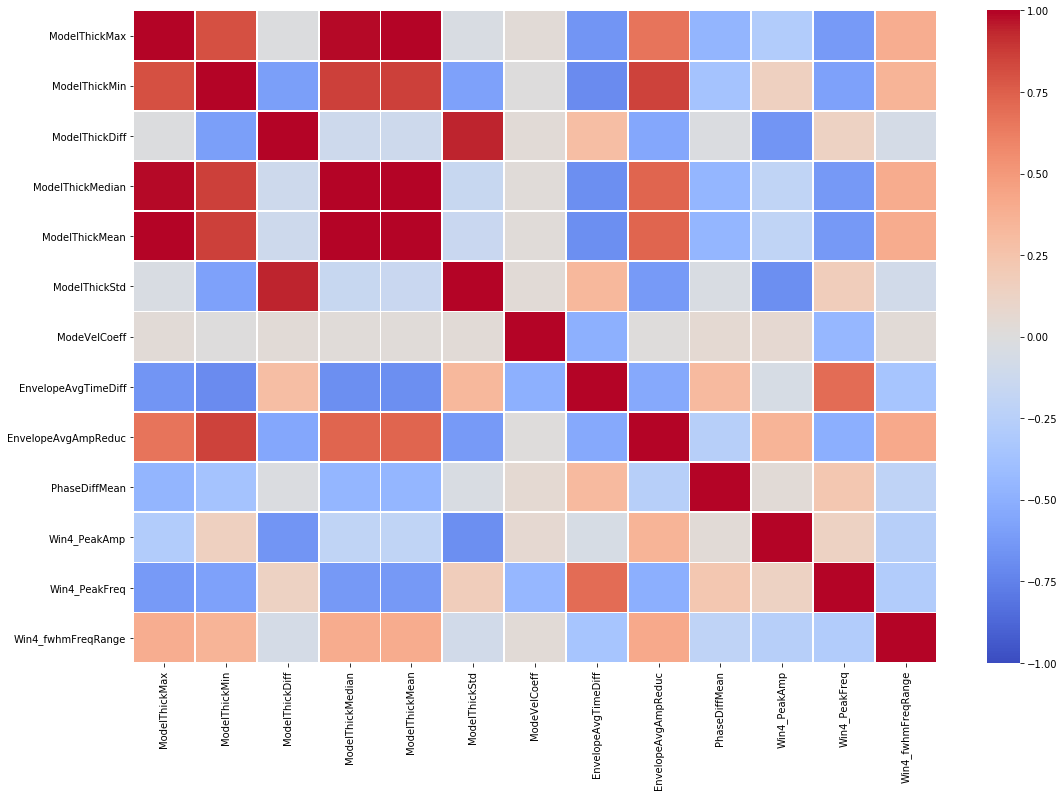

In [10]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr, vmin=-1, vmax=1, fmt='g', cmap='coolwarm', linewidths=0.75 );

## Clean up cells

In [11]:
df_raw.columns

Index(['ModelThickMax', 'ModelThickMin', 'ModelThickDiff', 'ModelThickMedian',
       'ModelThickMean', 'ModelThickStd', 'ModeVelCoeff',
       'EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean',
       'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange'],
      dtype='object')

In [12]:
#df = df_raw.drop(['ModelThickMax', 'ModelThickMin', 'ModelThickDiff', 'ModelThickMedian'], axis=1)
df = df_raw.drop(['ModelThickMax', 'ModelThickDiff', 'ModelThickMedian'], axis=1)

In [13]:
df.columns

Index(['ModelThickMin', 'ModelThickMean', 'ModelThickStd', 'ModeVelCoeff',
       'EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean',
       'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange'],
      dtype='object')

In [14]:
from sklearn import linear_model

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
train_set

,ModelThickMin,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
10,11.8,12.003281,0.146756,0.980,0.000088,-0.126508,-1.165304,1.124443e-06,47851.5625,30273.4375
334,11.6,12.431406,0.293662,1.020,0.000085,-0.139655,-0.148371,9.632608e-07,46875.0000,31250.0000
244,11.0,12.214687,0.327480,1.020,0.000084,-0.159365,-0.426356,9.296568e-07,44921.8750,31250.0000
298,9.2,10.235781,0.301470,0.987,0.000090,-0.206412,2.178800,9.568906e-07,48828.1250,31250.0000
306,12.0,12.488438,0.236188,0.990,0.000087,-0.145677,-0.668234,9.987646e-07,46875.0000,30273.4375
...,...,...,...,...,...,...,...,...,...,...
106,12.0,12.203593,0.146108,0.990,0.000087,-0.115282,-0.671808,1.149115e-06,46875.0000,31250.0000
270,10.4,12.203438,0.354734,0.980,0.000087,-0.159450,-1.505736,9.353810e-07,46875.0000,31250.0000
480,8.4,9.957188,0.363088,1.011,0.000089,-0.193960,2.269519,1.068695e-06,48828.1250,30273.4375
55,10.4,11.065781,0.268580,0.986,0.000089,-0.169885,-2.738444,1.074561e-06,48828.1250,30273.4375


In [18]:
test_set

,ModelThickMin,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
70,10.2,11.792188,0.334984,0.980,0.000089,-0.148979,-2.023706,1.002931e-06,48828.1250,31250.0000
447,10.4,11.447656,0.289310,1.002,0.000087,-0.156651,-1.786231,9.980378e-07,47851.5625,33203.1250
231,11.4,12.207344,0.304322,0.990,0.000087,-0.153794,-1.190440,9.802027e-07,47851.5625,31250.0000
208,9.2,9.687187,0.229950,1.012,0.000089,-0.183799,2.133621,1.160316e-06,48828.1250,30273.4375
39,11.0,11.825938,0.290720,1.020,0.000085,-0.164939,-0.915253,9.636096e-07,44921.8750,32226.5625
...,...,...,...,...,...,...,...,...,...,...
517,9.8,10.600468,0.306663,1.012,0.000089,-0.199816,-2.923062,1.090866e-06,48828.1250,29296.8750
198,10.8,11.145937,0.195370,0.997,0.000087,-0.162617,-2.034712,1.100815e-06,46875.0000,30273.4375
399,8.4,9.751563,0.349999,0.989,0.000094,-0.193849,1.194170,9.530384e-07,47851.5625,31250.0000
25,11.4,11.876094,0.233792,0.980,0.000088,-0.157284,-1.666975,9.875005e-07,47851.5625,31250.0000


In [20]:
# https://machinelearningmastery.com/multi-output-regression-models-with-python/

In [21]:
X_train = train_set[['EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean', 'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange']]
y_train = train_set[['ModelThickMin','ModelThickMean', 'ModelThickStd', 'ModeVelCoeff']]
X_test = test_set[['EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean', 'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange']]
y_test = test_set[['ModelThickMin','ModelThickMean', 'ModelThickStd', 'ModeVelCoeff']]

In [22]:
X_train

,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
10,0.000088,-0.126508,-1.165304,1.124443e-06,47851.5625,30273.4375
334,0.000085,-0.139655,-0.148371,9.632608e-07,46875.0000,31250.0000
244,0.000084,-0.159365,-0.426356,9.296568e-07,44921.8750,31250.0000
298,0.000090,-0.206412,2.178800,9.568906e-07,48828.1250,31250.0000
306,0.000087,-0.145677,-0.668234,9.987646e-07,46875.0000,30273.4375
...,...,...,...,...,...,...
106,0.000087,-0.115282,-0.671808,1.149115e-06,46875.0000,31250.0000
270,0.000087,-0.159450,-1.505736,9.353810e-07,46875.0000,31250.0000
480,0.000089,-0.193960,2.269519,1.068695e-06,48828.1250,30273.4375
55,0.000089,-0.169885,-2.738444,1.074561e-06,48828.1250,30273.4375


In [23]:
y_test

,ModelThickMin,ModelThickMean,ModelThickStd,ModeVelCoeff
70,10.2,11.792188,0.334984,0.980
447,10.4,11.447656,0.289310,1.002
231,11.4,12.207344,0.304322,0.990
208,9.2,9.687187,0.229950,1.012
39,11.0,11.825938,0.290720,1.020
...,...,...,...,...
517,9.8,10.600468,0.306663,1.012
198,10.8,11.145937,0.195370,0.997
399,8.4,9.751563,0.349999,0.989
25,11.4,11.876094,0.233792,0.980


In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(720, 6) (720, 4)
(180, 6) (180, 4)


## Linear Regression

In [25]:
model_linreg = linear_model.LinearRegression()

In [26]:
model_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_hat_linreg = model_linreg.predict(X_test)

In [28]:
y_hat_linreg.shape

(180, 4)

In [29]:
from sklearn.metrics import mean_squared_error

In [32]:
mse_linreg_ModelThickMin = mean_squared_error(y_test[['ModelThickMin']], y_hat_linreg[:,0])
mse_linreg_ModelThickMean = mean_squared_error(y_test[['ModelThickMean']], y_hat_linreg[:,1])
mse_linreg_ModelThickStd = mean_squared_error(y_test[['ModelThickStd']], y_hat_linreg[:,2])
mse_linreg_ModelVelCoeff = mean_squared_error(y_test[['ModeVelCoeff']], y_hat_linreg[:,3])
rmse_linreg_ModelThickMin = np.sqrt(mse_linreg_ModelThickMin)
rmse_linreg_ModelThickMean = np.sqrt(mse_linreg_ModelThickMean)
rmse_linreg_ModelThickStd = np.sqrt(mse_linreg_ModelThickStd)
rmse_linreg_ModelVelCoeff = np.sqrt(mse_linreg_ModelVelCoeff)


In [33]:
rmse_linreg_ModelThickMin, rmse_linreg_ModelThickMean, rmse_linreg_ModelThickStd, rmse_linreg_ModelVelCoeff

(0.5203419660386187,
 0.34302180134768706,
 0.052116283433044,
 0.01725452870797496)

## Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
y_hat_tree_reg = tree_reg.predict(X_test)

In [37]:
mse_tree_reg_ModelThickMin = mean_squared_error(y_test[['ModelThickMin']], y_hat_tree_reg[:,0])
mse_tree_reg_ModelThickMean = mean_squared_error(y_test[['ModelThickMean']], y_hat_tree_reg[:,1])
mse_tree_reg_ModelThickStd = mean_squared_error(y_test[['ModelThickStd']], y_hat_tree_reg[:,2])
mse_tree_reg_ModelVelCoeff = mean_squared_error(y_test[['ModeVelCoeff']], y_hat_tree_reg[:,3])
rmse_tree_reg_ModelThickMin = np.sqrt(mse_tree_reg_ModelThickMin)
rmse_tree_reg_ModelThickMean = np.sqrt(mse_tree_reg_ModelThickMean)
rmse_tree_reg_ModelThickStd = np.sqrt(mse_tree_reg_ModelThickStd)
rmse_tree_reg_ModelVelCoeff = np.sqrt(mse_tree_reg_ModelVelCoeff)

In [38]:
rmse_tree_reg_ModelThickMin, rmse_tree_reg_ModelThickMean, rmse_tree_reg_ModelThickStd, rmse_tree_reg_ModelVelCoeff

(0.5738757124441959,
 0.36647350811196405,
 0.052242730185448435,
 0.010465346252346727)

## Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
forest_reg = RandomForestRegressor()

In [41]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
y_hat_forest_reg = forest_reg.predict(X_test)

In [43]:
mse_forest_reg_ModelThickMin = mean_squared_error(y_test[['ModelThickMin']], y_hat_forest_reg[:,0])
mse_forest_reg_ModelThickMean = mean_squared_error(y_test[['ModelThickMean']], y_hat_forest_reg[:,1])
mse_forest_reg_ModelThickStd = mean_squared_error(y_test[['ModelThickStd']], y_hat_forest_reg[:,2])
mse_forest_reg_ModelVelCoeff = mean_squared_error(y_test[['ModeVelCoeff']], y_hat_forest_reg[:,3])
rmse_forest_reg_ModelThickMin = np.sqrt(mse_forest_reg_ModelThickMin)
rmse_forest_reg_ModelThickMean = np.sqrt(mse_forest_reg_ModelThickMean)
rmse_forest_reg_ModelThickStd = np.sqrt(mse_forest_reg_ModelThickStd)
rmse_forest_reg_ModelVelCoeff = np.sqrt(mse_forest_reg_ModelVelCoeff)

In [44]:
rmse_forest_reg_ModelThickMin, rmse_forest_reg_ModelThickMean, rmse_forest_reg_ModelThickStd, rmse_forest_reg_ModelVelCoeff

(0.35619180226389274,
 0.23853574126686788,
 0.03738786017202669,
 0.007346893417529186)

## SVM Regression

In [45]:
from sklearn.svm import SVR

In [46]:
svm_reg = SVR(kernel='poly', degree=5, C=100, epsilon=0.1)
svm_reg.fit(X_train, y_train['ModeVelCoeff'])

SVR(C=100, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
y_hat_svm_reg = svm_reg.predict(X_test)

In [48]:
rmse_svm_reg = np.sqrt(mean_squared_error(y_test[['ModeVelCoeff']], y_hat_svm_reg))

In [49]:
rmse_svm_reg

0.013156318868564058

## Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [52]:
scaler_X.fit(X_train)
scaler_y.fit(y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [53]:
#print(scaler_X.transform(X_test))

In [54]:
#print(scaler_y.transform(y_test))

In [55]:
X_scaled = scaler_X.transform(X_train)
y_scaled = scaler_y.transform(y_train)

In [56]:
#y_scaled[:,1]

### Random forest

In [57]:
forest_reg_scaled = RandomForestRegressor()
forest_reg_scaled.fit(X_scaled, y_scaled)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
y_hat_forest_reg_scaled = forest_reg_scaled.predict(scaler_X.transform(X_test))

In [59]:
rmse_forest_scaled_scaler_ModelThickMin = np.sqrt(mean_squared_error(y_test[['ModelThickMin']], scaler_y.inverse_transform(y_hat_forest_reg_scaled)[:,0]))
rmse_forest_scaled_scaler_ModelThickMean = np.sqrt(mean_squared_error(y_test[['ModelThickMean']], scaler_y.inverse_transform(y_hat_forest_reg_scaled)[:,1]))
rmse_forest_scaled_scaler_ModelThickStd = np.sqrt(mean_squared_error(y_test[['ModelThickStd']], scaler_y.inverse_transform(y_hat_forest_reg_scaled)[:,2]))
rmse_forest_scaled_scaler_ModelVelCoeff = np.sqrt(mean_squared_error(y_test[['ModeVelCoeff']], scaler_y.inverse_transform(y_hat_forest_reg_scaled)[:,3]))

In [60]:
rmse_forest_scaled_scaler_ModelThickMin, rmse_forest_scaled_scaler_ModelThickMean, rmse_forest_scaled_scaler_ModelThickStd, rmse_forest_scaled_scaler_ModelVelCoeff

(0.346473664222838,
 0.19193145188015176,
 0.032462690042080446,
 0.005639166125409481)

### Decision tree

In [61]:
tree_reg_scaled = DecisionTreeRegressor()
tree_reg_scaled.fit(X_scaled, y_scaled)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [62]:
y_hat_tree_reg_scaled = tree_reg_scaled.predict(scaler_X.transform(X_test))

In [63]:
rmse_tree_scaled_scaler_ModelThickMin = np.sqrt(mean_squared_error(y_test[['ModelThickMin']], scaler_y.inverse_transform(y_hat_tree_reg_scaled)[:,0]))
rmse_tree_scaled_scaler_ModelThickMean = np.sqrt(mean_squared_error(y_test[['ModelThickMean']], scaler_y.inverse_transform(y_hat_tree_reg_scaled)[:,1]))
rmse_tree_scaled_scaler_ModelThickStd = np.sqrt(mean_squared_error(y_test[['ModelThickStd']], scaler_y.inverse_transform(y_hat_tree_reg_scaled)[:,2]))
rmse_tree_scaled_scaler_ModelVelCoeff = np.sqrt(mean_squared_error(y_test[['ModeVelCoeff']], scaler_y.inverse_transform(y_hat_tree_reg_scaled)[:,3]))

In [64]:
rmse_tree_scaled_scaler_ModelThickMin, rmse_tree_scaled_scaler_ModelThickMean, rmse_tree_scaled_scaler_ModelThickStd, rmse_tree_scaled_scaler_ModelVelCoeff

(0.5314550257965809,
 0.2338446254991954,
 0.05180488343661522,
 0.009000613631165867)

### Linear regression

In [65]:
model_scaled = linear_model.LinearRegression()

In [66]:
model_scaled.fit(X_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_hat_linreg_scaled = model_scaled.predict(scaler_X.transform(X_test))

In [68]:
rmse_linreg_scaled_ModelThickMin = np.sqrt(mean_squared_error(y_test[['ModelThickMin']], scaler_y.inverse_transform(y_hat_linreg_scaled)[:,0]))
rmse_linreg_scaled_ModelThickMean = np.sqrt(mean_squared_error(y_test[['ModelThickMean']], scaler_y.inverse_transform(y_hat_linreg_scaled)[:,1]))
rmse_linreg_scaled_ModelThickStd = np.sqrt(mean_squared_error(y_test[['ModelThickStd']], scaler_y.inverse_transform(y_hat_linreg_scaled)[:,2]))
rmse_linreg_scaled_ModelVelCoeff = np.sqrt(mean_squared_error(y_test[['ModeVelCoeff']], scaler_y.inverse_transform(y_hat_linreg_scaled)[:,3]))

In [69]:
rmse_linreg_scaled_ModelThickMin, rmse_linreg_scaled_ModelThickMean, rmse_linreg_scaled_ModelThickStd, rmse_linreg_scaled_ModelVelCoeff

(0.5203419660844016,
 0.3430218020420487,
 0.052116283525365265,
 0.017254528714979695)

## Summary

In [70]:
#Linear regression errors
rmse_linreg_ModelThickMin, rmse_linreg_ModelThickMean, rmse_linreg_ModelThickStd, rmse_linreg_ModelVelCoeff

(0.5203419660386187,
 0.34302180134768706,
 0.052116283433044,
 0.01725452870797496)

In [71]:
#Normalized linear regression errors
rmse_linreg_scaled_ModelThickMin, rmse_linreg_scaled_ModelThickMean, rmse_linreg_scaled_ModelThickStd, rmse_linreg_scaled_ModelVelCoeff

(0.5203419660844016,
 0.3430218020420487,
 0.052116283525365265,
 0.017254528714979695)

In [83]:
#Decision tree regression errors
rmse_tree_reg_ModelThickMin, rmse_tree_reg_ModelThickMean, rmse_tree_reg_ModelThickStd, rmse_tree_reg_ModelVelCoeff

(0.5738757124441959,
 0.36647350811196405,
 0.052242730185448435,
 0.010465346252346727)

In [84]:
#Normalized decision tree regression errors
rmse_tree_scaled_scaler_ModelThickMin, rmse_tree_scaled_scaler_ModelThickMean, rmse_tree_scaled_scaler_ModelThickStd, rmse_tree_scaled_scaler_ModelVelCoeff

(0.5314550257965809,
 0.2338446254991954,
 0.05180488343661522,
 0.009000613631165867)

In [85]:
#Random forest regression errors
rmse_forest_reg_ModelThickMin, rmse_forest_reg_ModelThickMean, rmse_forest_reg_ModelThickStd, rmse_forest_reg_ModelVelCoeff

(0.35619180226389274,
 0.23853574126686788,
 0.03738786017202669,
 0.007346893417529186)

In [86]:
#Normalized random forest regression errors
rmse_forest_scaled_scaler_ModelThickMin, rmse_forest_scaled_scaler_ModelThickMean, rmse_forest_scaled_scaler_ModelThickStd, rmse_forest_scaled_scaler_ModelVelCoeff

(0.346473664222838,
 0.19193145188015176,
 0.032462690042080446,
 0.005639166125409481)

**Making a comparison table for best performing ML model:**

In [94]:
test = y_test.copy(deep=True)

In [95]:
y_hat_forest_reg_scaled_inverse = scaler_y.inverse_transform(y_hat_forest_reg_scaled)

In [96]:
test['Predicted MTMin'] = y_hat_forest_reg_scaled_inverse[:,0]
test['Predicted MTMean'] = y_hat_forest_reg_scaled_inverse[:,1]
test['Predicted MTStd'] = y_hat_forest_reg_scaled_inverse[:,2]
test['Predicted MVelCoeff'] = y_hat_forest_reg_scaled_inverse[:,3]

In [97]:
test.columns

Index(['ModelThickMin', 'ModelThickMean', 'ModelThickStd', 'ModeVelCoeff',
       'Predicted MTMin', 'Predicted MTMean', 'Predicted MTStd',
       'Predicted MVelCoeff'],
      dtype='object')

In [98]:
test = test[['ModelThickMin', 'Predicted MTMin', 'ModelThickMean', 'Predicted MTMean', 
             'ModelThickStd', 'Predicted MTStd','ModeVelCoeff','Predicted MVelCoeff']]

In [99]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)

In [100]:
test

,ModelThickMin,Predicted MTMin,ModelThickMean,Predicted MTMean,ModelThickStd,Predicted MTStd,ModeVelCoeff,Predicted MVelCoeff
70,10.2,10.412,11.792188,11.785636,0.334984,0.321992,0.980,0.98078
447,10.4,10.680,11.447656,11.721148,0.289310,0.291044,1.002,1.00199
231,11.4,11.074,12.207344,12.079022,0.304322,0.290219,0.990,0.99365
208,9.2,9.158,9.687187,9.848936,0.229950,0.256466,1.012,1.00676
39,11.0,10.382,11.825938,11.874247,0.290720,0.323209,1.020,1.01667
351,12.2,12.118,12.416406,12.348851,0.148212,0.155789,0.997,0.99870
299,12.4,12.254,12.602344,12.486596,0.146133,0.144776,1.020,1.01649
110,12.0,11.934,12.210469,12.127918,0.145991,0.140362,0.980,0.98272
72,10.2,10.542,11.792188,11.854733,0.334984,0.314183,1.000,0.99685
86,10.2,10.358,11.792188,11.814353,0.334984,0.326931,0.990,0.98846


In [101]:
test.columns

Index(['ModelThickMin', 'Predicted MTMin', 'ModelThickMean',
       'Predicted MTMean', 'ModelThickStd', 'Predicted MTStd', 'ModeVelCoeff',
       'Predicted MVelCoeff'],
      dtype='object')

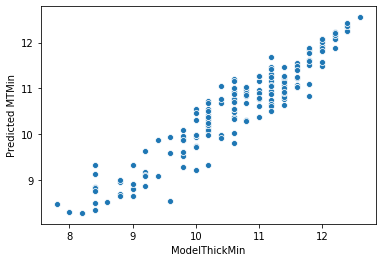

In [103]:
sns.scatterplot(data=test, x="ModelThickMin", y="Predicted MTMin");

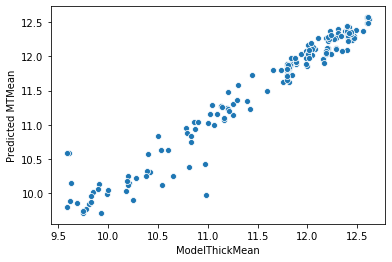

In [104]:
sns.scatterplot(data=test, x="ModelThickMean", y="Predicted MTMean");

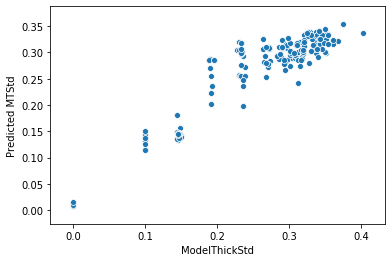

In [109]:
sns.scatterplot(data=test, x="ModelThickStd", y="Predicted MTStd");

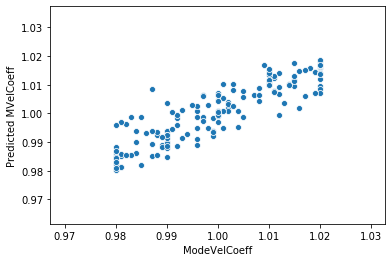

In [110]:
sns.scatterplot(data=test, x="ModeVelCoeff", y="Predicted MVelCoeff");

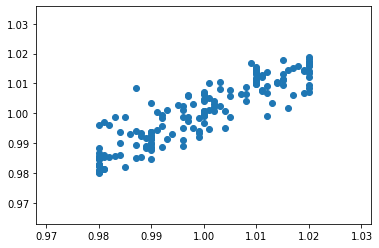

In [114]:
plt.scatter(test["ModeVelCoeff"], test["Predicted MVelCoeff"]);